**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [DICOM in Python](#toc5_1_)    
    - [Extraction of DICOM File](#toc5_1_1_)    
    - [Visualization of DICOM File](#toc5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyDicom before using PyDicom functions

# DICOM (Digital Imaging and Communications in Medicine) is the standard protocol for
# the management and transmission of medical images and related data, and is used by
# many healthcare facilities

# PyDicom is a pure Python package for working with DICOM files
import pydicom

In [2]:
# The `pathlib` module is similar to the `os.path` module, but `pathlib` provides a more
# advanced and convenient interface than `os.path`

# It is possible to use `pathlib` to represent file paths as specialized `Path` objects
# instead of plain strings
from pathlib import Path

In [3]:
import numpy as np

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime
from functools import wraps
import random
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [10]:
sys.path.append("../")

In [11]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[DICOM in Python](#toc0_)

### <a id='toc5_1_1_'></a>[Extraction of DICOM File](#toc0_)

In [12]:
# The dataset used in this practice project is a very small subset of CT images extracted from
# the Cancer Imaging Archive (TCIA), which contains middle slices of all CT images where
# valid age, modality, and contrast tags can be found

# The dataset is provided by the Kaggel dataset called CT Medical Imaging
# (https://www.kaggle.com/datasets/kmader/siim-medical-images) under the license type
# (https://creativecommons.org/licenses/by/3.0)

# The link to the TCIA archive of the full dataset is
# https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
# The main function of PyDicom to read and parse DICOM files is `read_file`
dicom_file = pydicom.read_file(dir_path + sample_dcm)

tabulation = Form_Generator()
tabulation.heading_printer("Initial understanding of DICOM file")

statements = [
    """
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_path + sample_dcm)
"""
]
tabulation.statement_generator(statements)

variables = ["dicom_file"]
values = [str(reprlib_rules.repr(dicom_file))]
tabulation.variable_generator(variables, values)

expressions = [
    "dicom_file[0x0028, 0x0010]",
    "dicom_file[0x0028, 0x0011]",
    "dicom_file[0x0018, 0x0015]",
    "dicom_file.Rows",
    "dicom_file.Columns",
    "dicom_file.BodyPartExamined",
    "dicom_file.keys()",
    "dicom_file.values()",
    "dicom_file.dir()",
    'dicom_file.dir("Image")',
]
results = [
    str(dicom_file[0x0028, 0x0010]),
    str(dicom_file[0x0028, 0x0011]),
    str(dicom_file[0x0018, 0x0015]),
    str(dicom_file.Rows),
    str(dicom_file.Columns),
    str(dicom_file.BodyPartExamined),
    str(reprlib_rules.repr(dicom_file.keys())),
    str(reprlib_rules.repr(dicom_file.values())),
    str(reprlib_rules.repr(dicom_file.dir())),
    str(reprlib_rules.repr(dicom_file.dir("Image"))),
]
tabulation.expression_generator(expressions, results, 1)

Initial understanding of DICOM file

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | dir_path = "../Datasets/Kaggle - CT Medical           |
    |     Images/dicom_dir/"                                |
    | sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"     |
    | dicom_file = pydicom.read_file(dir_path + sample_dcm) |
    +-------------------------------------------------------+
    +------------+------------------------------------------------+
    | Variable   | Value                                          |
    +------------+------------------------------------------------+
    | dicom_file | Dataset.file_meta                              |
    |            |         -------------------------------        |
    |            | (0002, 0000) File Meta Information Group       |
    |            |         Length  UL: 194                 

In [13]:
# DICOM data has an attribute called `pixel_array` that provides more useful pixel data
# for uncompressed images that can be passed to the graphics library for viewing

# To use this attribute, the system must have the NumPy numeric package installed,
# since `pixel_array` returns a NumPy array
ct = dicom_file.pixel_array

tabulation = Form_Generator()
tabulation.heading_printer("Getting pixel data from DICOM file")

statements = ["ct = dicom_file.pixel_array"]
tabulation.statement_generator(statements)

variables = ["ct"]
values = [str(reprlib_rules.repr(ct))]
tabulation.variable_generator(variables, values)

expressions = ["ct.shape"]
results = [str(ct.shape)]
tabulation.expression_generator(expressions, results)

Getting pixel data from DICOM file

    +-----------------------------+
    | Statement                   |
    +-----------------------------+
    | ct = dicom_file.pixel_array |
    +-----------------------------+
    +----------+------------------------------------------------+
    | Variable | Value                                          |
    +----------+------------------------------------------------+
    | ct       | array([[0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        ...,                                    |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16) |
    +----------+------------------------------------------------+
    +------------+------------+
    | Expression | Result 

### <a id='toc5_1_2_'></a>[Visualization of DICOM File](#toc0_)

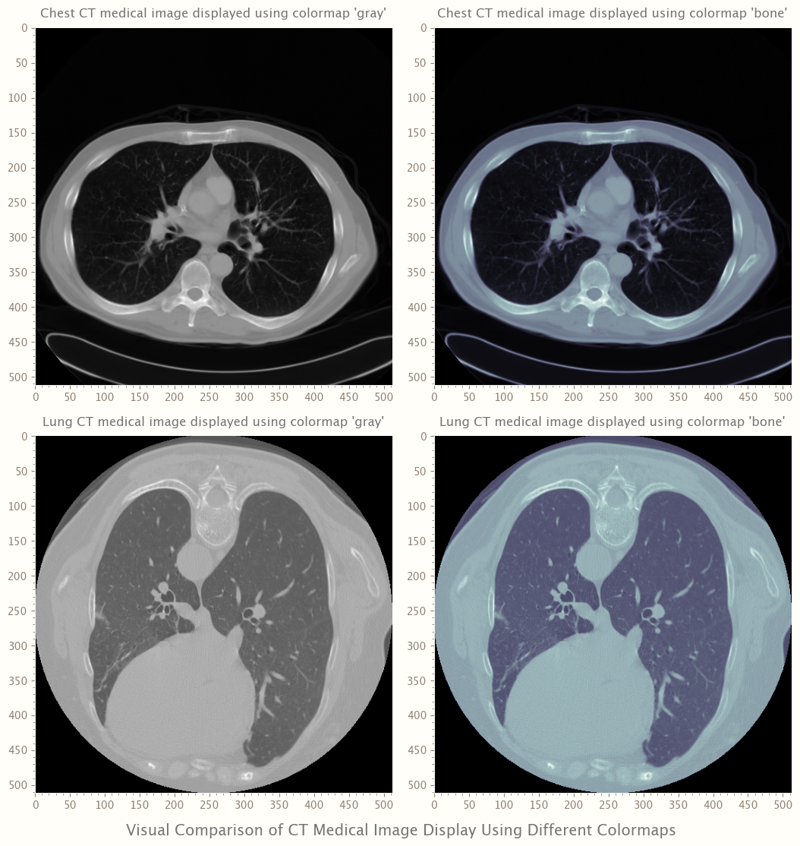

In [14]:
def image_display(image, ax, title, cmap):
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    x_ticks = list(range(0, image.shape[1], 50))
    y_ticks = list(range(0, image.shape[0], 50))
    ax.set(xticks=x_ticks, xticklabels=x_ticks, yticks=y_ticks, yticklabels=y_ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    ax.minorticks_on()
    return ax


# Path classes are divided between pure paths, which provide purely computational
# operations without I/O, and concrete paths, which inherit from pure paths but also
# provide I/O operations
path_object = Path(dir_path)
# `PurePath.name` returns a string representing the final path component, excluding
# the drive and root directory (if any)

# When a path points to a directory, `Path.iterdir` generates a path object of the directory's
# contents

# `Path.is_file` returns True if the path points to a normal file or to a symbolic link
# to a normal file, False if it points to another type of file
random_dicom_path = random.choice(
    [
        file.name
        for file in path_object.iterdir()
        if file.is_file() & (pydicom.read_file(file).BodyPartExamined != "CHEST")
    ]
)

random_dicom_file = pydicom.read_file(dir_path + random_dicom_path)

plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1] / 4 * 5)

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    ct,
    axs[0, 0],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

image_display(
    ct,
    axs[0, 1],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 0],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 1],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)


fig.suptitle(
    "Visual Comparison of CT Medical Image Display Using Different Colormaps",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

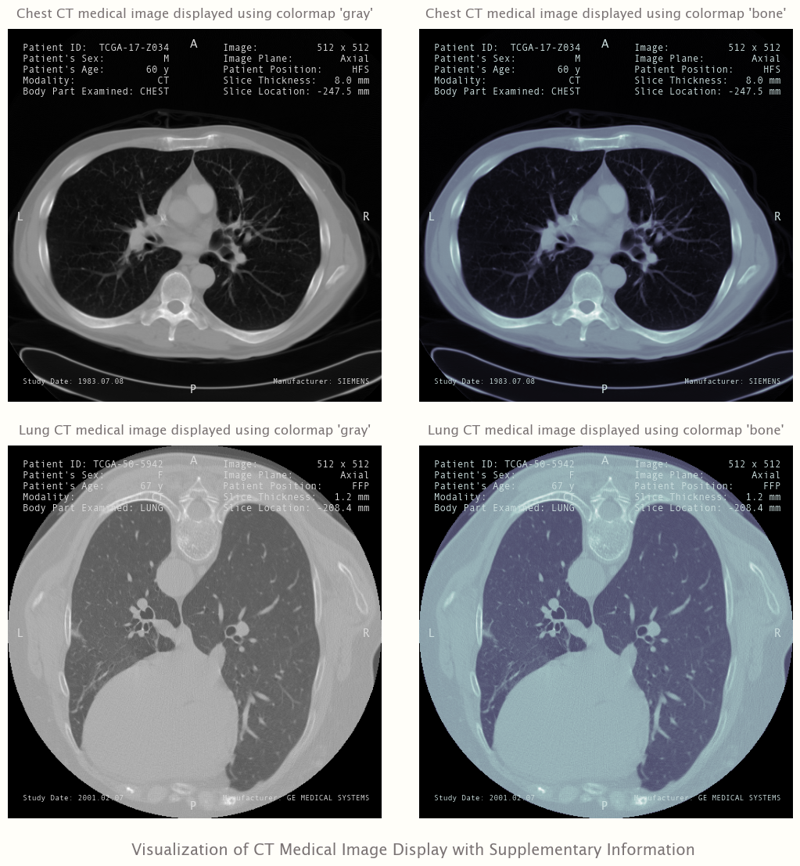

In [15]:
def annotation_color(cmap):
    cmap_color = mpl.colormaps[cmap]
    return cmap_color(0.85)


def image_orientation(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        Left, Right, Anterior, Posterior, Head, Feet = "L", "R", "A", "P", "H", "F"
        axial_plane = [Anterior, Right, Posterior, Left]
        coronal_plane = [Right, Head, Left, Feet]
        sagittal_plane = [Anterior, Head, Posterior, Feet]
        plane = func(*args, **kwargs)
        # Patient Position (0018,5100) specifies the position of the patient relative to
        # the space of the imaging device and is used for annotation purposes only,
        # but does not provide a precise mathematical relationship between the patient and
        # the imaging device
        patient_position = dicom_file.PatientPosition
        if plane == "Axial":
            term_list = ["S", "DR", "P", "DL"]
            top = 4 - term_list.index(patient_position[2:])
            if patient_position.startswith("HF"):
                right = top + 1
                left = right + 2
            else:
                left = top + 1
                right = left + 2
            bottom = top + 2
            top, right, bottom, left = [
                axial_plane[index] if index < 4 else axial_plane[index - 4]
                for index in [top, right, bottom, left]
            ]
        elif plane == "Coronal":
            term_list = ["DL", "DR"]
            top = term_list.index(patient_position[2:]) * 2
            if patient_position.startswith("AF"):
                right = top + 1
                left = right + 2
            else:
                left = top + 1
                right = left + 2
            bottom = top + 2
            top, right, bottom, left = [
                coronal_plane[index] if index < 4 else coronal_plane[index - 4]
                for index in [top, right, bottom, left]
            ]
        elif plane == "Sagittal":
            term_list = ["LF", "RF"]
            if patient_position.endswith("S"):
                top = 0
                right = term_list.index(patient_position[:2]) * 2 + 1
                left = right + 2
            else:
                top = 2
                left = term_list.index(patient_position[:2]) * 2 + 1
                right = left + 2
            bottom = top + 2
            top, right, bottom, left = [
                sagittal_plane[index] if index < 4 else sagittal_plane[index - 4]
                for index in [top, right, bottom, left]
            ]
        else:
            top, right, bottom, left = np.repeat("", 4)
        return plane, top, right, bottom, left

    return wrapper


def orientation_annotator(func):
    @wraps(func)
    def wrapper(ax, cmap, *args, **kwargs):
        plane, top, right, bottom, left = func(*args, **kwargs)
        ax.text(0.4875, 0.95, top, transform=ax.transAxes, c=annotation_color(cmap))
        ax.text(0.4875, 0.025, bottom, transform=ax.transAxes, c=annotation_color(cmap))
        ax.text(0.95, 0.4875, right, transform=ax.transAxes, c=annotation_color(cmap))
        ax.text(0.025, 0.4875, left, transform=ax.transAxes, c=annotation_color(cmap))
        return plane

    return wrapper


def first_max(list):
    max_element = list[0]
    for element in list[1:]:
        if len(element) > len(max_element):
            max_element = element
    return max_element


def text_aligner(text):
    line_list = text.split("\n")
    max_length = len(first_max(line_list))
    line_list = [
        (":" + " " * (max_length - len(line))).join(line.split(":"))
        if len(line) < max_length
        else line
        for line in line_list
    ]
    text = "\n".join(line_list)
    return text


def plane_information_annotator(func):
    @wraps(func)
    def wrapper(ax, cmap, dicom_file):
        plane = func(ax, cmap, dicom_file)
        text = f"Image: {dicom_file.Columns} x {dicom_file.Rows}"
        text += f"\nImage Plane: {plane}"
        text += f"\nPatient Position: {dicom_file.PatientPosition}"
        text += f"\nSlice Thickness: {dicom_file.SliceThickness:.1f} mm"
        text += f"\nSlice Location: {dicom_file.SliceLocation:.1f} mm"
        ax.text(
            0.575,
            0.825,
            text_aligner(text),
            transform=ax.transAxes,
            fontsize=9,
            fontfamily="monospace",
            c=annotation_color(cmap),
        )

    return wrapper


@plane_information_annotator
@orientation_annotator
@image_orientation
def get_plane_information(dicom_file):
    # The DICOM standard defines a patient-oriented reference coordinate system (RCS) that
    # enables the user to measure the position and orientation of the image relative to
    # the patient

    # Image Orientation (Patient) (0020,0037) specifies the cosine of the orientation of
    # the first row and column relative to the patient, which should be provided as a pair,
    # where the row values for the x, y, and z axes are followed by the column values for
    # the x, y, and z axes

    # The orientation of the axes is determined solely by the orientation of the patient, i.e.,
    # the RCS and Image Orientation (Patient) (0020,0037) values specify the orientation of
    # the image frame rows and columns
    IOP = dicom_file.ImageOrientationPatient
    row_xyz = IOP[:3]
    column_xyz = IOP[3:]
    # `numpy.cross` returns the cross product of two vector arrays

    # The geometric interpretation of the cross product is that two vectors determine a plane,
    # and the cross product points in a direction different from both vectors

    # The Patient-Based Coordinate System is a right handed system, i.e., the vector
    # cross product of a unit vector along the positive x-axis and a unit vector along
    # the positive y-axis is equal to a unit vector along the positive z-axis
    plane = [abs(round(x)) for x in np.cross(row_xyz, column_xyz)]
    # The Image Type (0008,0008) identifies important image identification features
    # and it returns the Pixel Data Characteristics, Patient Examination Characteristics,
    # Modality Specific Characteristics, and Implementation Specific Identifiers

    # While the third value (Modality Specific Characteristics) should identify any
    # specialization specific to the Image Information Object Definition (IOD), it
    # and the values that follow it are not mandatory, unlike the first two values,
    # and therefore some DICOM data does not have this value
    if plane[0] == 1 and plane[1] == 0 and plane[2] == 0:
        return "Sagittal"
    elif plane[0] == 0 and plane[1] == 1 and plane[2] == 0:
        return "Coronal"
    elif plane[0] == 0 and plane[1] == 0 and plane[2] == 1:
        return "Axial"
    else:
        "Unknown"


def get_patient_information(ax, cmap, dicom_file):
    text = f"Patient ID: {dicom_file.PatientID}"
    text += f"\nPatient's Sex: {dicom_file.PatientSex}"
    text += f"\nPatient's Age: {dicom_file.PatientAge.strip(str(0))[:-1]} y"
    text += f"\nModality: {dicom_file.Modality}"
    text += f"\nBody Part Examined: {dicom_file.BodyPartExamined}"
    ax.text(
        0.04,
        0.825,
        text_aligner(text),
        transform=ax.transAxes,
        fontsize=9,
        fontfamily="monospace",
        c=annotation_color(cmap),
    )


def get_date_information(ax, cmap, dicom_file):
    date = datetime.strptime(dicom_file.StudyDate, "%Y%m%d").strftime("%Y.%m.%d")
    text = f"Study Date: {date}"
    ax.text(
        0.04,
        0.05,
        text,
        transform=ax.transAxes,
        fontsize=7,
        fontfamily="monospace",
        c=annotation_color(cmap),
    )


def get_manufacturer_information(ax, cmap, dicom_file):
    text = f"Manufacturer: {dicom_file.Manufacturer}"
    ax.text(
        0.525,
        0.05,
        text.rjust(36),
        transform=ax.transAxes,
        fontsize=7,
        fontfamily="monospace",
        c=annotation_color(cmap),
    )


def DICOM_2D_image(dicom_file, ax, title, cmap):
    ax.imshow(dicom_file.pixel_array, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    ax.set(xticks=[], yticks=[], frame_on=False)
    get_patient_information(ax, cmap, dicom_file)
    get_plane_information(ax, cmap, dicom_file)
    get_date_information(ax, cmap, dicom_file)
    get_manufacturer_information(ax, cmap, dicom_file)


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1] / 4 * 5)

fig, axs = plt.subplots(nrows=2, ncols=2)

DICOM_2D_image(
    dicom_file,
    axs[0, 0],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

DICOM_2D_image(
    dicom_file,
    axs[0, 1],
    f"{dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)

DICOM_2D_image(
    random_dicom_file,
    axs[1, 0],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'gray'",
    cmap="gray",
)

DICOM_2D_image(
    random_dicom_file,
    axs[1, 1],
    f"{random_dicom_file.BodyPartExamined.capitalize()} CT medical image displayed using "
    "colormap 'bone'",
    cmap="bone",
)


fig.suptitle(
    "Visualization of CT Medical Image Display with Supplementary Information",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()